In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, segmentation

In [ ]:
def threshold(path, k=3):                                                                                                                                               
    # Read and convert image
    i = cv2.imread(path)
    i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    g = cv2.cvtColor(i, cv2.COLOR_RGB2GRAY)
    
    # Threshold segmentation
    _, thresh = cv2.threshold(g, 127, 255, cv2.THRESH_BINARY)
    
    # Edge-based segmentation
    edges = cv2.Canny(g, 100, 200)
    
    # K-means clustering segmentation
    pixel_values = i.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    
    # Define criteria for k-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    
    # Apply k-means
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Convert back to uint8
    centers = np.uint8(centers)
    
    # Reconstruct segmented image
    labels = labels.flatten()
    kmeans_image = centers[labels]
    kmeans_image = kmeans_image.reshape(i.shape)
    
    return thresh, edges, kmeans_image

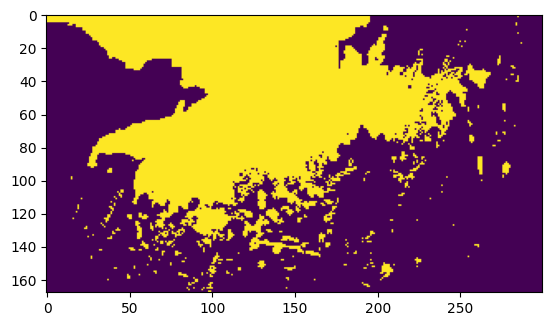

In [12]:
plt.imshow(threshold('yd.jpg'))